In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline

In [2]:
data = pd.read_csv('C:/Users/Hoa Binh/OneDrive/Desktop/Codecamp/Dataset/Monthly Champagne Sales/Perrin Freres monthly champagne sales millions.csv')
data.head()

,Month,Sales
0,1964-01,2815
1,1964-02,2672
2,1964-03,2755
3,1964-04,2721
4,1964-05,2946


In [3]:
data.columns=['Month','Sales']

In [4]:
data.isnull().sum()

Month    0
Sales    0
dtype: int64

In [5]:
data.isnull().sum()

Month    0
Sales    0
dtype: int64

In [6]:
data['Month']=pd.to_datetime(data['Month'])

In [7]:
data.head()

,Month,Sales
0,1964-01-01,2815
1,1964-02-01,2672
2,1964-03-01,2755
3,1964-04-01,2721
4,1964-05-01,2946


In [8]:
data.set_index('Month',inplace=True)

In [9]:
data.head()

,Sales
Month,
1964-01-01,2815
1964-02-01,2672
1964-03-01,2755
1964-04-01,2721
1964-05-01,2946


In [10]:
data.describe()

,Sales
count,105.000000
mean,4761.152381
std,2553.502601
min,1413.000000
25%,3113.000000
50%,4217.000000
75%,5221.000000
max,13916.000000


### Visualization in data

<Axes: xlabel='Month'>

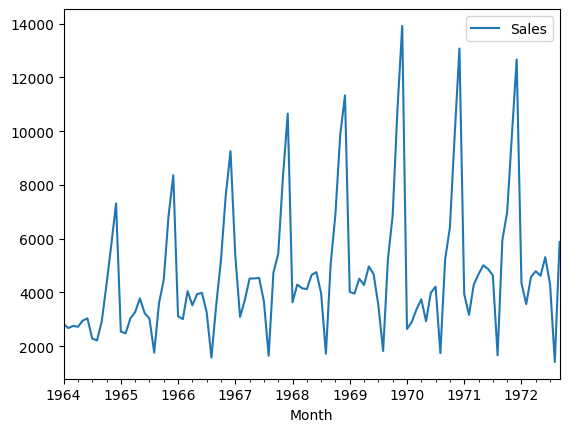

In [11]:
data.plot()

Based on the visualization, we can see a seasonal spike pattern of champaign sales. To be more specific, the spike take place at the end of every year (over 7000$) and then falls back at the beginning of each year.

In addition, the pattern of our dataset suggest a seasonal effects with positive trends. This indicate a Non-Stationary Time Series

In [12]:
from statsmodels.tsa.stattools import adfuller

### Perforiming Null hypothesis testing:
unit root test to determines how strongly a time series is defined by a trend

In [13]:
def adfuller_test(sales):
    result=adfuller(sales)
    labels=['ADF Test statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value))
        if result[1]<=0.05:
            print("strong evidence against the null hypothesis(H0),reject the null hypothesis")
        else:
            print('weak evidence against null hypothesis, time series has a unit root ')
        

In [14]:
adfuller_test(data['Sales'])

ADF Test statistic : -1.8335930563276195
weak evidence against null hypothesis, time series has a unit root 
p-value : 0.3639157716602467
weak evidence against null hypothesis, time series has a unit root 
#Lags Used : 11
weak evidence against null hypothesis, time series has a unit root 
Number of Observations Used : 93
weak evidence against null hypothesis, time series has a unit root 


Null Hypothesis (H0): If failed to be rejected, it suggests the time series has a unit root, meaning it is non-stationary. It has some time dependent structure.

Alternate Hypothesis (H1): The null hypothesis is rejected; it suggests the time series does not have a unit root, meaning it is stationary. It does not have time-dependent structure.

Conclusion: p-value > 0.05. Null hypothes is not rejected -> non-stationary

### Differencing 
Stabilise the mean of a time series to reduce trend and seasonality

In [68]:
data['sales first difference']=data['Sales']-data['Sales'].shift(1)

In [69]:
data['Seasonal First Difference']=data['Sales']-data['Sales'].shift(12)

In [70]:
data.head(14)

,Sales,sales first difference,Seasonal First Difference,forecast
Month,,,,
1964-01-01,2815,NaN,NaN,0.000000
1964-02-01,2672,-143.0,NaN,2145.631686
1964-03-01,2755,83.0,NaN,2198.169280
1964-04-01,2721,-34.0,NaN,2337.958521
1964-05-01,2946,225.0,NaN,2382.155283
1964-06-01,3036,90.0,NaN,2560.876682
1964-07-01,2282,-754.0,NaN,2658.940467
1964-08-01,2212,-70.0,NaN,2275.427545
1964-09-01,2922,710.0,NaN,2237.355399


In [18]:
adfuller_test(data['Seasonal First Difference'].dropna())

ADF Test statistic : -7.626619157213166
strong evidence against the null hypothesis(H0),reject the null hypothesis
p-value : 2.0605796968136632e-11
strong evidence against the null hypothesis(H0),reject the null hypothesis
#Lags Used : 0
strong evidence against the null hypothesis(H0),reject the null hypothesis
Number of Observations Used : 92
strong evidence against the null hypothesis(H0),reject the null hypothesis


Conclusion: After differencing the dataset, p-value < 0.05. Null hypothes rejected -> stationary

<Axes: xlabel='Month'>

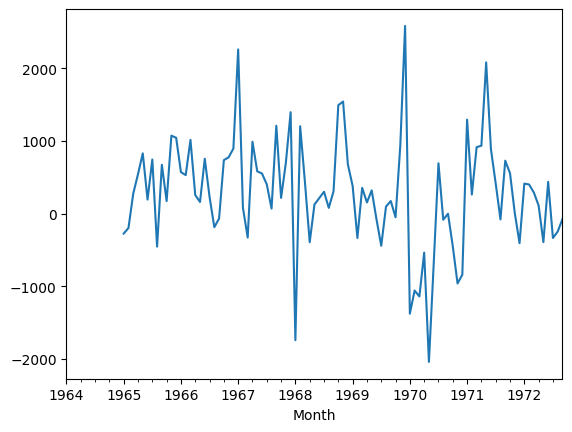

In [71]:
data['Seasonal First Difference'].plot()

The votality of the adjusted dataset has been reduced but there are still a gap around +/- 2000$ across the time frame

### Autoregression (AR)

In [20]:
train = data.Sales[2:78]
test = data.Sales[78:]
print(test)

Month
1970-07-01     4217
1970-08-01     1738
1970-09-01     5221
1970-10-01     6424
1970-11-01     9842
1970-12-01    13076
1971-01-01     3934
1971-02-01     3162
1971-03-01     4286
1971-04-01     4676
1971-05-01     5010
1971-06-01     4874
1971-07-01     4633
1971-08-01     1659
1971-09-01     5951
1971-10-01     6981
1971-11-01     9851
1971-12-01    12670
1972-01-01     4348
1972-02-01     3564
1972-03-01     4577
1972-04-01     4788
1972-05-01     4618
1972-06-01     5312
1972-07-01     4298
1972-08-01     1413
1972-09-01     5877
Name: Sales, dtype: int64


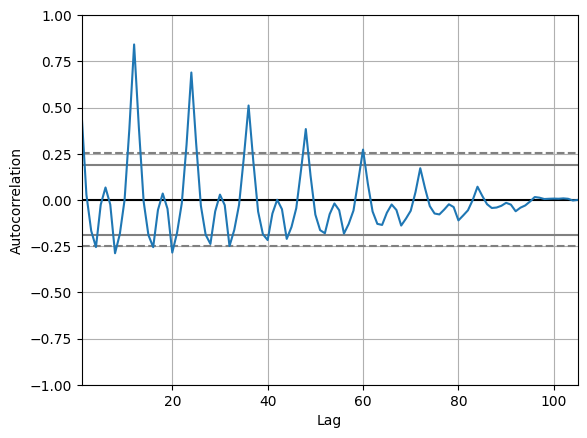

In [66]:
# Checking for randomness or data values at varying time lags.
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(data['Sales'])
plt.show()

In [22]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

In [23]:
from statsmodels.tsa.arima.model import ARIMA

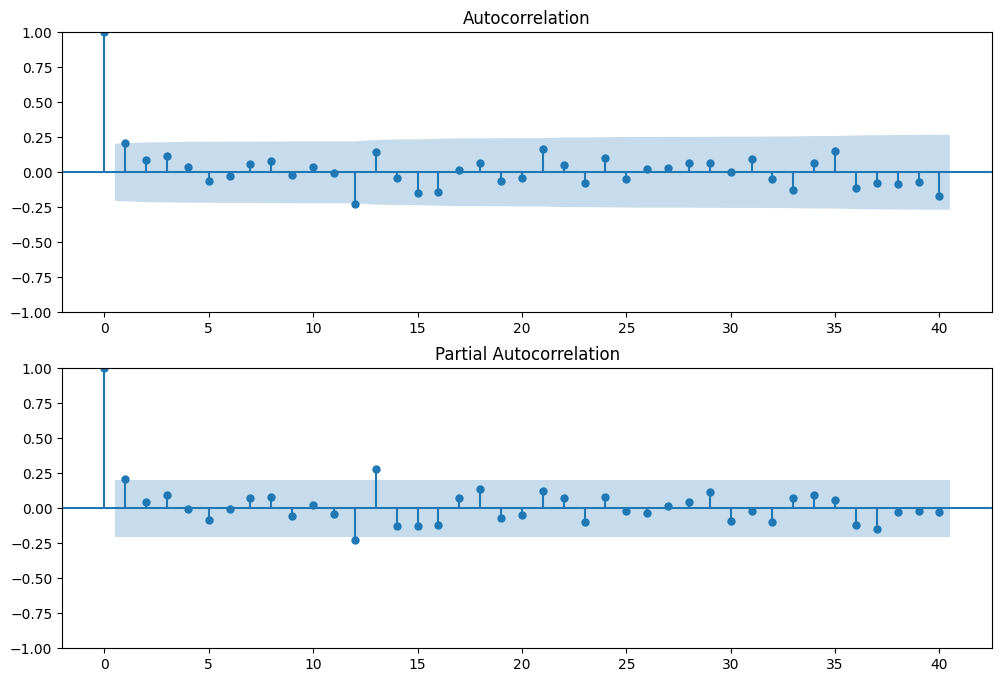

In [24]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(data['Seasonal First Difference'].iloc[13:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(data['Seasonal First Difference'].iloc[13:],lags=40,ax=ax2)

The ACF plot shows a significant positive spike at lag 12, which suggests the presence of a seasonal pattern with a period of 12 months. The PACF plot cuts off after lag 1, indicating that a simple AR(1) model may be appropriate for this data. However, the seasonal pattern in the ACF plot suggests that a seasonal ARIMA model (SARIMA) may be more suitable for forecasting monthly champagne sales.

### Autoregressive Integrated Moving Average (ARIMA) 

In [72]:
model= ARIMA(data['Sales'],order=(1,1,1))
model_fit = model.fit()

C:\Users\Hoa Binh\Miniconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Hoa Binh\Miniconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Hoa Binh\Miniconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [73]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Sales   No. Observations:                  105
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -952.814
Date:                Fri, 19 Jan 2024   AIC                           1911.627
Time:                        08:39:25   BIC                           1919.560
Sample:                    01-01-1964   HQIC                          1914.841
                         - 09-01-1972                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4545      0.114      3.999      0.000       0.232       0.677
ma.L1         -0.9666      0.056    -17.316      0.000      -1.076      -0.857
sigma2      5.226e+06   6.17e+05      8.473      0.000    4.02e+06    6.43e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.91   Jarque-Bera (JB):                 2.59
Prob(Q):                              0.34   Prob(JB):                         0.27
Heteroskedasticity (H):               3.40   Skew:                             0.05
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.77
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<Axes: xlabel='Month'>

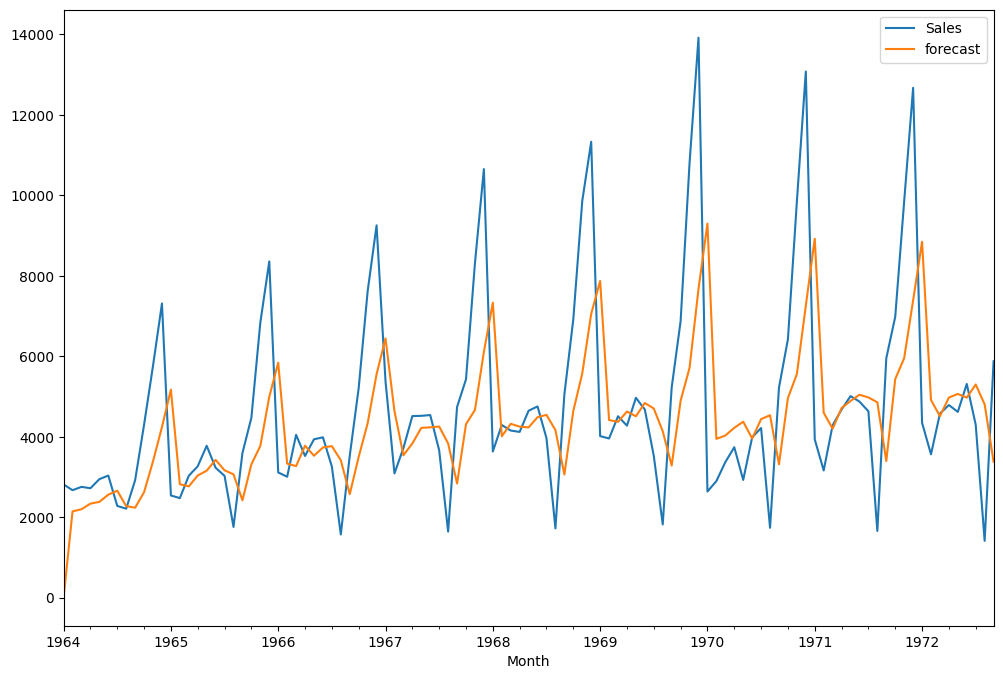

In [75]:
data['forecast']=model_fit.predict(dynamic=False)
data[['Sales','forecast']].plot(figsize=(12,8))

The forecasted values do resemble the pattern of actual testing data when catching all the seasonal movement. However, its accuracy is relatively low. The forecast line underestimated all the spikes and overrestimated all the drops. As the year goes on, the differences between actual and forecast values increase 

In [77]:
models=sm.tsa.statespace.SARIMAX(data['Sales'],order=(1,1,1),seasonal_order=(1,1,1,12))
results=model.fit()

C:\Users\Hoa Binh\Miniconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Hoa Binh\Miniconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [78]:
from pandas.tseries.offsets import DateOffset
future_dates=[data.index[-1]+ DateOffset(months=x)for x in range(0,24)]

In [79]:
# Expanding dataset to plot out forecast values
future_datest_df = pd.DataFrame(index=future_dates[1:],columns=data.columns)

In [80]:
future_datest_df.tail()

,Sales,sales first difference,Seasonal First Difference,forecast
1974-04-01,NaN,NaN,NaN,NaN
1974-05-01,NaN,NaN,NaN,NaN
1974-06-01,NaN,NaN,NaN,NaN
1974-07-01,NaN,NaN,NaN,NaN
1974-08-01,NaN,NaN,NaN,NaN


In [81]:
# Merge future dataset to main dataset
future_df=pd.concat([data,future_datest_df])

C:\Users\Hoa Binh\AppData\Local\Temp\ipykernel_10264\3911857921.py:2: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  future_df=pd.concat([data,future_datest_df])


### Fitting ARIMA model against testing data

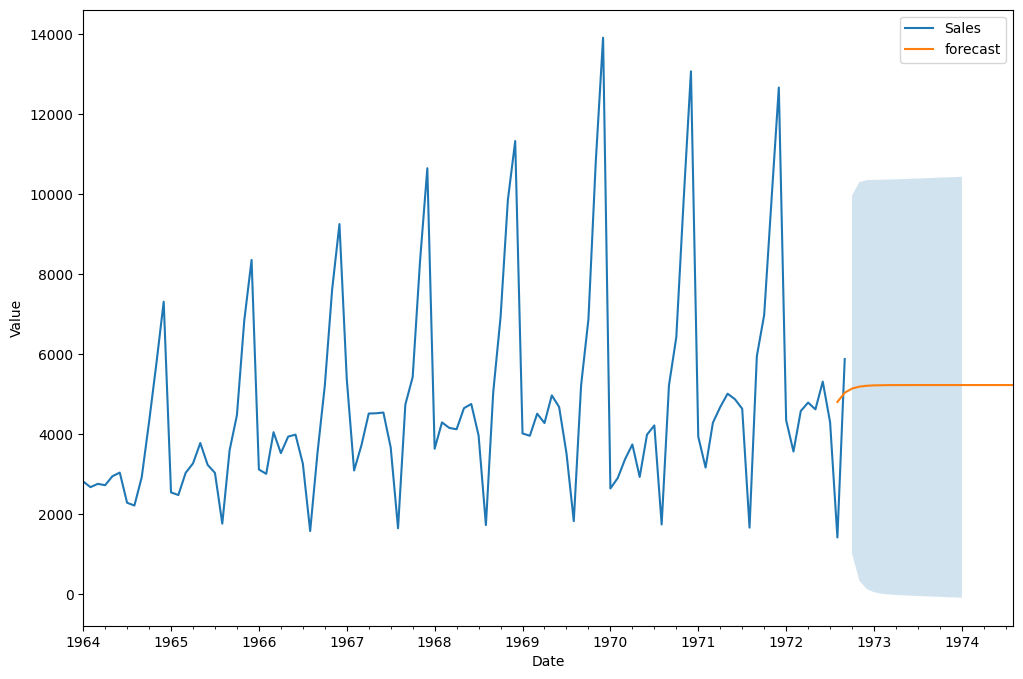

In [82]:
# Fitting ARIMA model with confidence interval band of 95%
import matplotlib.pyplot as plt

future_df['forecast'] = results.predict(start=103, end=128, dynamic=True)

# Plot the data and the forecast
fig, ax = plt.subplots(figsize=(12,8))
future_df['Sales'].plot(ax=ax, label='Sales')
future_df[['forecast']].plot(ax=ax, label='forecast')

# Calculate the 95% confidence interval
forecast_mean = future_df['forecast']
forecast_ci_lower = results.get_forecast(16).conf_int()['lower Sales']
forecast_ci_upper =results.get_forecast(16).conf_int()['upper Sales']

# Shade the 95% confidence interval
ax.fill_between(forecast_ci_lower.index, forecast_ci_lower, forecast_ci_upper, alpha=0.2)

# Add axis labels and legend
ax.set_xlabel('Date')
ax.set_ylabel('Value')
ax.legend()

plt.show()

It appears that the blue line, which represents the actual sales data, has a generally increasing trend over the years. On the other hand, the orange line, which represents the forecasted sales, seems to follow the trend of the actual sales data but with some discrepancies.

In particular, the orange line appears to overestimate the sales for some months and underestimate the sales for others. However, the overall accuracy of the orange line in capturing the general trend of the blue line is still relatively high.

Therefore, while there may be some room for improvement in the accuracy of the forecasted sales, the orange line can still be considered a useful tool for predicting future Champagne sales trends.

In [83]:
# Created ARIMA model and stored all forecasted value in a new list
data_endog = list(train.copy(deep=True))
sales_pred = []

for obs in test: 
    model = ARIMA(endog=data_endog, order=(1,1,1))
    model_fit = model.fit()
    forecast = model_fit.forecast()[0]

    sales_pred.append(forecast)
    data_endog.append(obs)

C:\Users\Hoa Binh\Miniconda\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


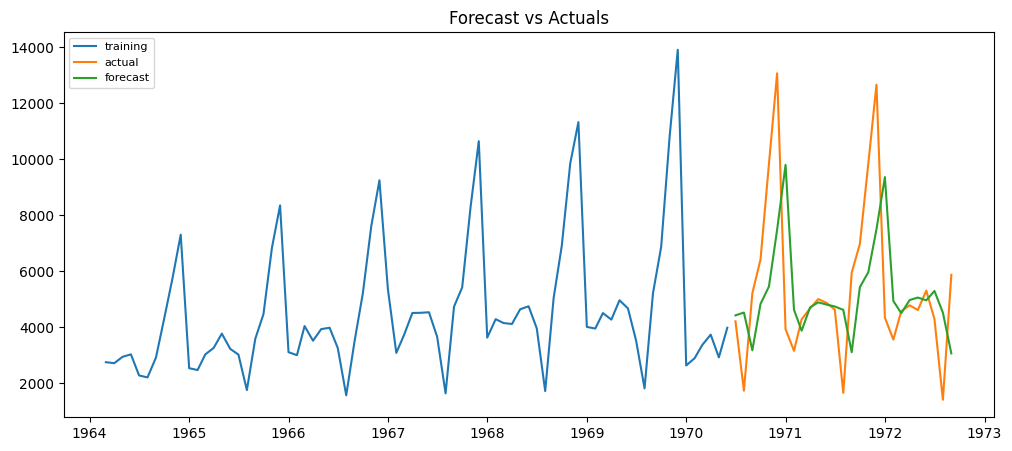

In [84]:
# PLotting forecast value in comparison with actual testing data
from statsmodels.tsa.stattools import acf
fitted = model.fit()

# Make as pandas series
fc_series = pd.Series(sales_pred, index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')

plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

Based on the visualization provided, it can be observed that the green line, which represents the training data, closely follows the actual sales data (represented by the black dots) up until around 1966. However, the actual sales data starts to deviate from the training data and increases at a faster rate than the green line.

On the other hand, the orange line, which represents the forecasts generated by the ARIMA(1,1,1) model, consistently falls below the actual sales data. This indicates that the model may be underestimating the sales data.

Therefore, while the ARIMA(1,1,1) model is able to capture some of the trends in the sales data, it may not be the most accurate model for forecasting future sales. It may be worth exploring other models or adjusting the parameters of the ARIMA model to improve its accuracy.

Overall, it is important to carefully evaluate the accuracy of any forecasting model and consider multiple approaches to ensure reliable and accurate predictions